In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
sns.set_style('darkgrid')

In [12]:
df = pd.read_csv('vehicles.csv')
df.head(8)

,Age,Gender,Income,Favorite Transport
0,5,female,NaN,bicycle
1,8,male,NaN,scooter
2,10,female,NaN,bicycle
3,14,male,NaN,metro
4,16,male,NaN,metro
5,18,female,NaN,metro
6,20,male,200.0,scooter
7,22,female,500.0,scooter


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 26 non-null     int64  
 1   Gender              26 non-null     object 
 2   Income              20 non-null     float64
 3   Favorite Transport  26 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 964.0+ bytes


In [14]:
df['Favorite Transport'].unique()

array(['bicycle', 'scooter', 'metro', 'car', 'taxi', 'helicopter'],
      dtype=object)

In [15]:
df.value_counts('Favorite Transport')

Favorite Transport
car           9
metro         4
scooter       4
taxi          4
helicopter    3
bicycle       2
dtype: int64

In [16]:
df.isnull().sum()

Age                   0
Gender                0
Income                6
Favorite Transport    0
dtype: int64

In [17]:
df['Income'] = df['Income'].fillna(0.0)
df.head(8)

,Age,Gender,Income,Favorite Transport
0,5,female,0.0,bicycle
1,8,male,0.0,scooter
2,10,female,0.0,bicycle
3,14,male,0.0,metro
4,16,male,0.0,metro
5,18,female,0.0,metro
6,20,male,200.0,scooter
7,22,female,500.0,scooter


In [18]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Favorite Transport    0
dtype: int64

In [19]:
label_encoder = LabelEncoder()
encoded_genders = label_encoder.fit_transform(df['Gender'])
encoded_genders

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1])

In [20]:
df['Gender'] = encoded_genders
df.head(8)

,Age,Gender,Income,Favorite Transport
0,5,0,0.0,bicycle
1,8,1,0.0,scooter
2,10,0,0.0,bicycle
3,14,1,0.0,metro
4,16,1,0.0,metro
5,18,0,0.0,metro
6,20,1,200.0,scooter
7,22,0,500.0,scooter


In [21]:
df.dtypes

Age                     int64
Gender                  int32
Income                float64
Favorite Transport     object
dtype: object

In [22]:
X = df.drop(columns='Favorite Transport')
y = df['Favorite Transport']
X.head()

,Age,Gender,Income
0,5,0,0.0
1,8,1,0.0
2,10,0,0.0
3,14,1,0.0
4,16,1,0.0


In [23]:
y.head()

0    bicycle
1    scooter
2    bicycle
3      metro
4      metro
Name: Favorite Transport, dtype: object

In [24]:
model = DecisionTreeClassifier()

In [25]:
model.fit(X, y)

DecisionTreeClassifier()

In [26]:
test_df = pd.DataFrame({
    'Age': [12, 30, 75],
    'Gender': [0, 0, 1],
    'Income': [0.0, 4000, 50000]
})
test_df

,Age,Gender,Income
0,12,0,0.0
1,30,0,4000.0
2,75,1,50000.0


In [27]:
model.predict(test_df)

array(['bicycle', 'car', 'helicopter'], dtype=object)

### Export to DOT file

In [28]:
tree.export_graphviz(model, out_file='decision_tree_model.dot', filled=True, feature_names=['Age', 'Gender', 'Income'], class_names=sorted(y.unique()))

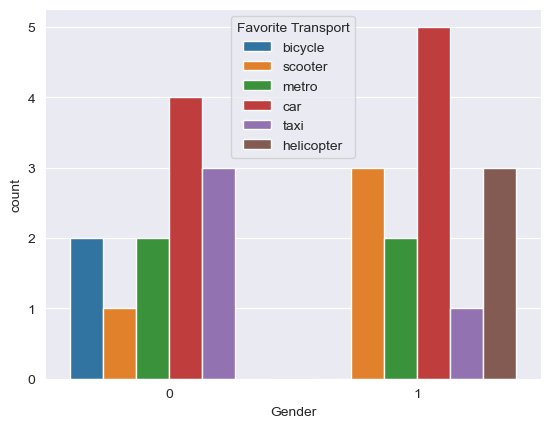

In [29]:
sns.countplot(x=df['Gender'], hue=df['Favorite Transport'])
plt.show()

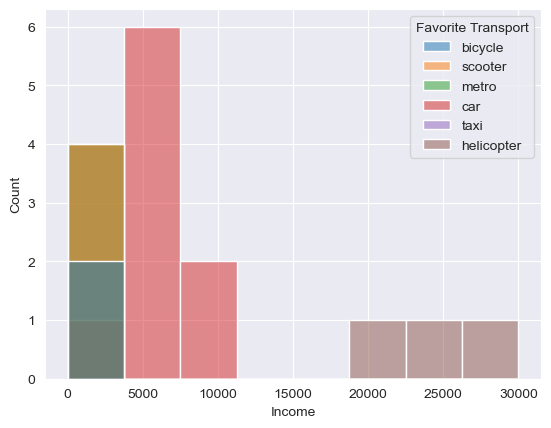

In [30]:
sns.histplot(x=df['Income'], hue=df['Favorite Transport'])
plt.show()

### Evaluate Accuracy of the Model

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Train shape', X_train.shape)
print('Test shape', X_test.shape)
print('Source data shape', X.shape)
print('Test input data', X_test)
print('Test target data', y_test)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

model_score = accuracy_score(y_test, predictions)
print('Model score', model_score)

Train shape (20, 3)
Test shape (6, 3)
Source data shape (26, 3)
Test input data     Age  Gender   Income
25   75       1  30000.0
14   45       1   3000.0
17   53       0   1300.0
3    14       1      0.0
9    25       0    800.0
16   49       1   8000.0
Test target data 25    helicopter
14          taxi
17          taxi
3          metro
9          metro
16           car
Name: Favorite Transport, dtype: object
Model score 0.6666666666666666
